In [1]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from PIL import Image
from glob import glob
import time

In [3]:
import torch
import torch.nn as nn
class BMBaseModel(nn.Module):

    def __init__(self, network, num_classes):
        super(BMBaseModel, self).__init__()
        if network == "resnet":
            self.featurizer = torch.hub.load('pytorch/vision:v0.10.0', "resnet18", pretrained=True)
        elif network == "inception":
            self.featurizer = torch.hub.load('pytorch/vision:v0.10.0', 'inception_v3', pretrained=True)
        #self.featurizer = self._freeze_layers(self.featurizer)
        self.mid_blocks = nn.Sequential(
                nn.Linear(1000, 2048),
                nn.Linear(2048, 1024),
                nn.Linear(1024, 256),
        )
        self.output_layer = nn.Linear(256, num_classes)

    def _freeze_layers(self, network):
        for param in network.parameters():
            param.requires_grad = False
        return network
    
    def forward(self, x):
        featurizer_op = self.featurizer(x)
        flattened_op = featurizer_op.view(featurizer_op.shape[0], -1)
        return self.output_layer(self.mid_blocks(flattened_op))

exp1model = BMBaseModel("resnet", 21)

Using cache found in C:\Users\Kylo Ren/.cache\torch\hub\pytorch_vision_v0.10.0


In [4]:
exp1best_chkp = torch.load("results\\featurizer_resent_unfreezed_f1_score\\latest_model_unfreezed.pt")
exp1model.load_state_dict(exp1best_chkp["model"])

<All keys matched successfully>

In [5]:
from torchcam.methods import SmoothGradCAMpp
cam_extractor1 = SmoothGradCAMpp(exp1model)

In [6]:
from torchvision.transforms.functional import normalize, resize, to_pil_image
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask
from torchvision.transforms import transforms

In [10]:
def visualize_grad_cam(source, model,cam_extractor, save_dir):
  img = Image.open(source)
  img = img.resize((224, 224),Image.ANTIALIAS)
  img = transforms.ToTensor()(img).unsqueeze(0)
  out = model(img.cuda())
  activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)
  result = overlay_mask(to_pil_image(img.squeeze(0).cpu()), to_pil_image(activation_map[0].cpu(), mode='F'), alpha=0.5)
  plt.imshow(result);plt.axis('off');plt.tight_layout()
  plt.savefig(os.path.join(save_dir,source.split("\\")[-1]))

In [11]:
exp1model = exp1model.cuda()

gradcam_test\ABE_00002.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\ABE_00003.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\ABE_00004.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\ART_06027.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\ART_06028.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\ART_06029.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\BAS_00012.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\BAS_00013.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\BAS_00014.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\BLA_09012.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\BLA_09013.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\BLA_09014.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\EBO_08027.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\EBO_08028.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\EBO_08029.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\EOS_03012.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\EOS_03013.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\EOS_03014.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\FGC_00039.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\FGC_00040.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\FGC_00041.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\HAC_00012.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\HAC_00013.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\HAC_00014.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\KSC_00017.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\KSC_00018.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\KSC_00019.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\LYI_00035.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\LYI_00036.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\LYI_00037.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\LYT_08019.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\LYT_08020.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\LYT_08021.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\MMZ_02015.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\MMZ_02016.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\MMZ_02017.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\MON_02039.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\MON_02040.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\MON_02041.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\MYB_05016.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\MYB_05017.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\MYB_05018.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\NGB_03019.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\NGB_03020.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\NGB_03021.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\NGS_07005.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\NGS_07006.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\NGS_07007.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\NIF_01157.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\NIF_01158.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\NIF_01159.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\OTH_00279.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\OTH_00280.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\OTH_00281.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\PEB_02025.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\PEB_02026.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\PEB_02027.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\PLM_05035.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\PLM_05036.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\PLM_05037.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\PMO_06003.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\PMO_06004.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


gradcam_test\PMO_06005.jpg


C:\Users\Kylo Ren\AppData\Local\Temp\ipykernel_2400\3420456157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224),Image.ANTIALIAS)


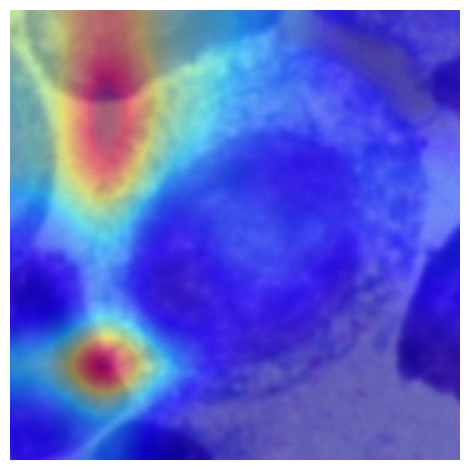

In [12]:
test_files = sorted(glob("gradcam_test/*"))
save_dir = "gradcam_results/exp1best"
for fp in test_files:
    print(fp)
    visualize_grad_cam(fp, exp1model, cam_extractor1, save_dir)